In [158]:
import itertools
import sys, os

import numpy as np
import pandas as pd
from scipy.special import comb
from scipy import stats
import scipy.cluster.hierarchy as hac
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
sns.set(rc={'figure.figsize':(15,8)})
sns.set_context('poster')
from sklearn.model_selection import train_test_split

In [2]:
import tsfresh

In [3]:
%load_ext autoreload
%autoreload 2
import CCPA_lib as cp


In [4]:
sns.set_context('poster')

In [5]:
ppallete = "BuGn"
porder = ['MIT9313', 'Natl2A', 'C9B', 'MIT9312', 'MED4']
pedge = 'green'
apallete = "Oranges"
aorder = ['1A3', 'DE', 'DE1', 'ATCC', 'BS11']
aedge='orange'              

In [6]:
df = pd.read_pickle('CCPA.pkl.gz')

In [7]:
dfc = df.loc[(df.experiment.isin(['e3', 'e4','e5', 'e6'])) & (df.culture == 'Co_Culture')]

Text(0.5,0.98,'Progress per PRO (FL)')

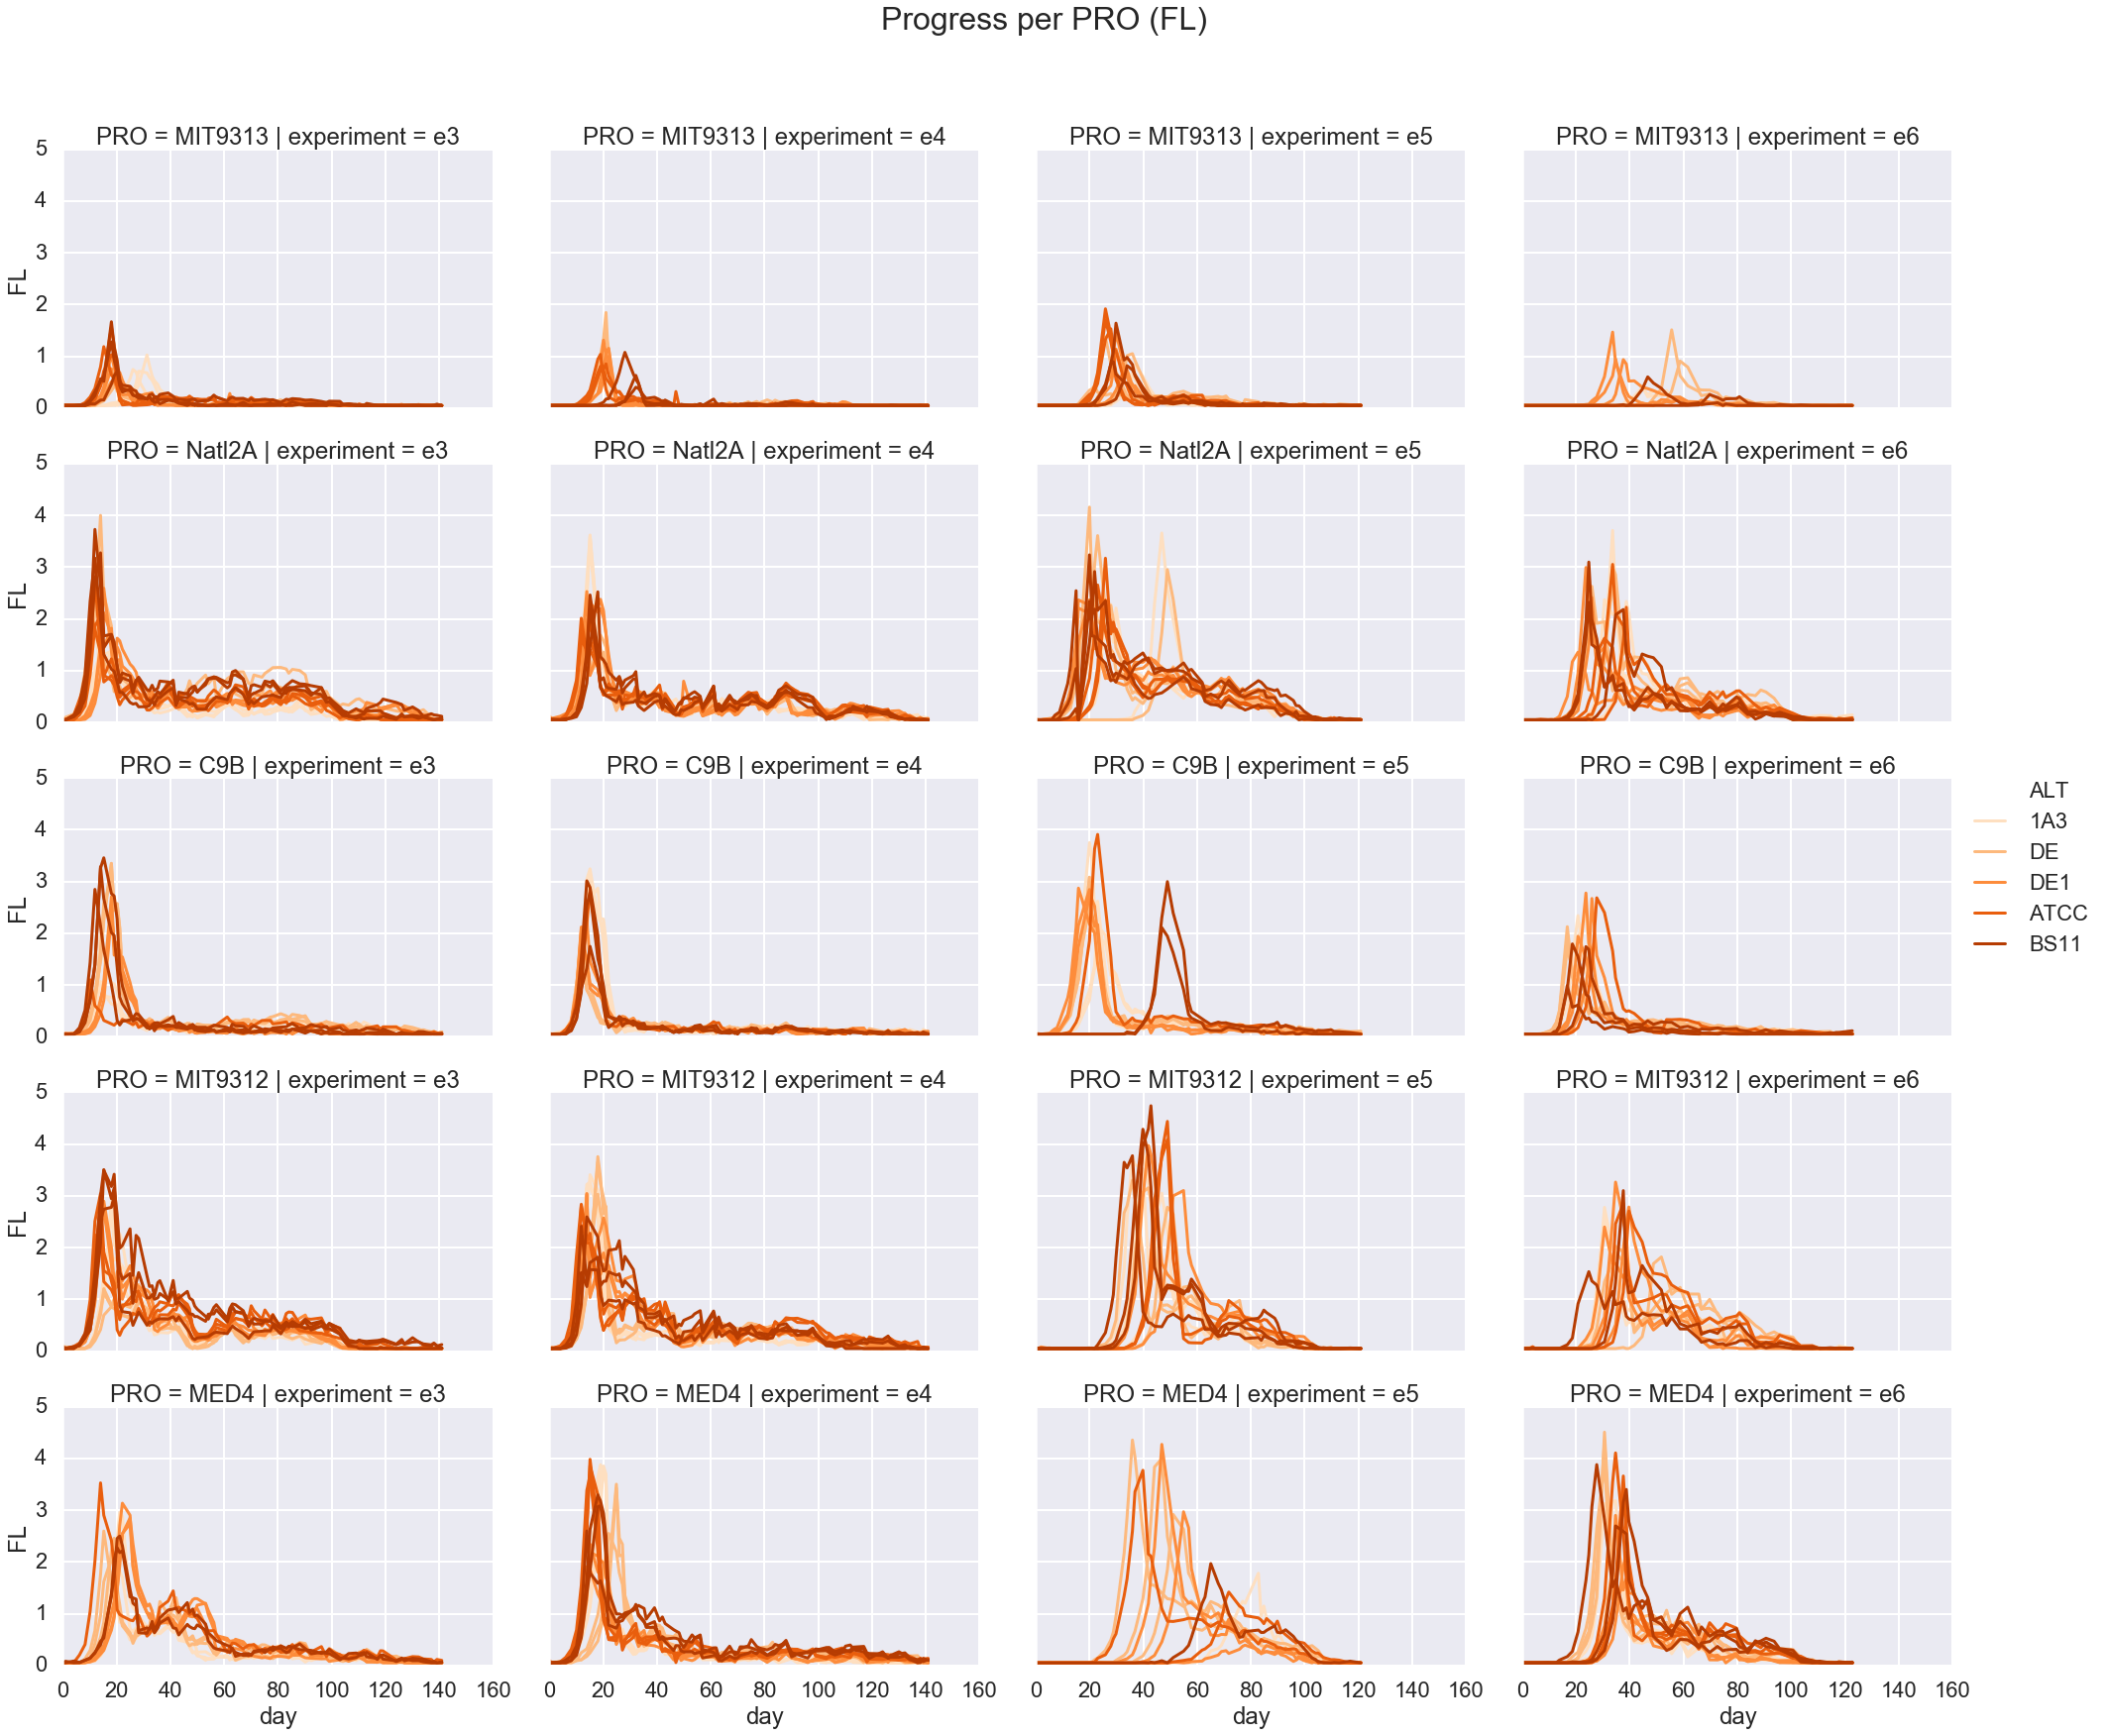

In [8]:
sns.relplot(data=dfc, x='day', y='FL', kind='line', #ci='sd',
#            col='PRO', hue='ALT', row='experiment', 
                           estimator=None, units='experiment_sample',
            row='PRO', hue='ALT', col='experiment', row_order=porder,

            palette=apallete, hue_order=aorder,
            aspect=1.4
           )
#plt.title("Progress per PRO")
plt.subplots_adjust(top=0.9)
plt.suptitle("Progress per PRO (FL)", fontsize=32)


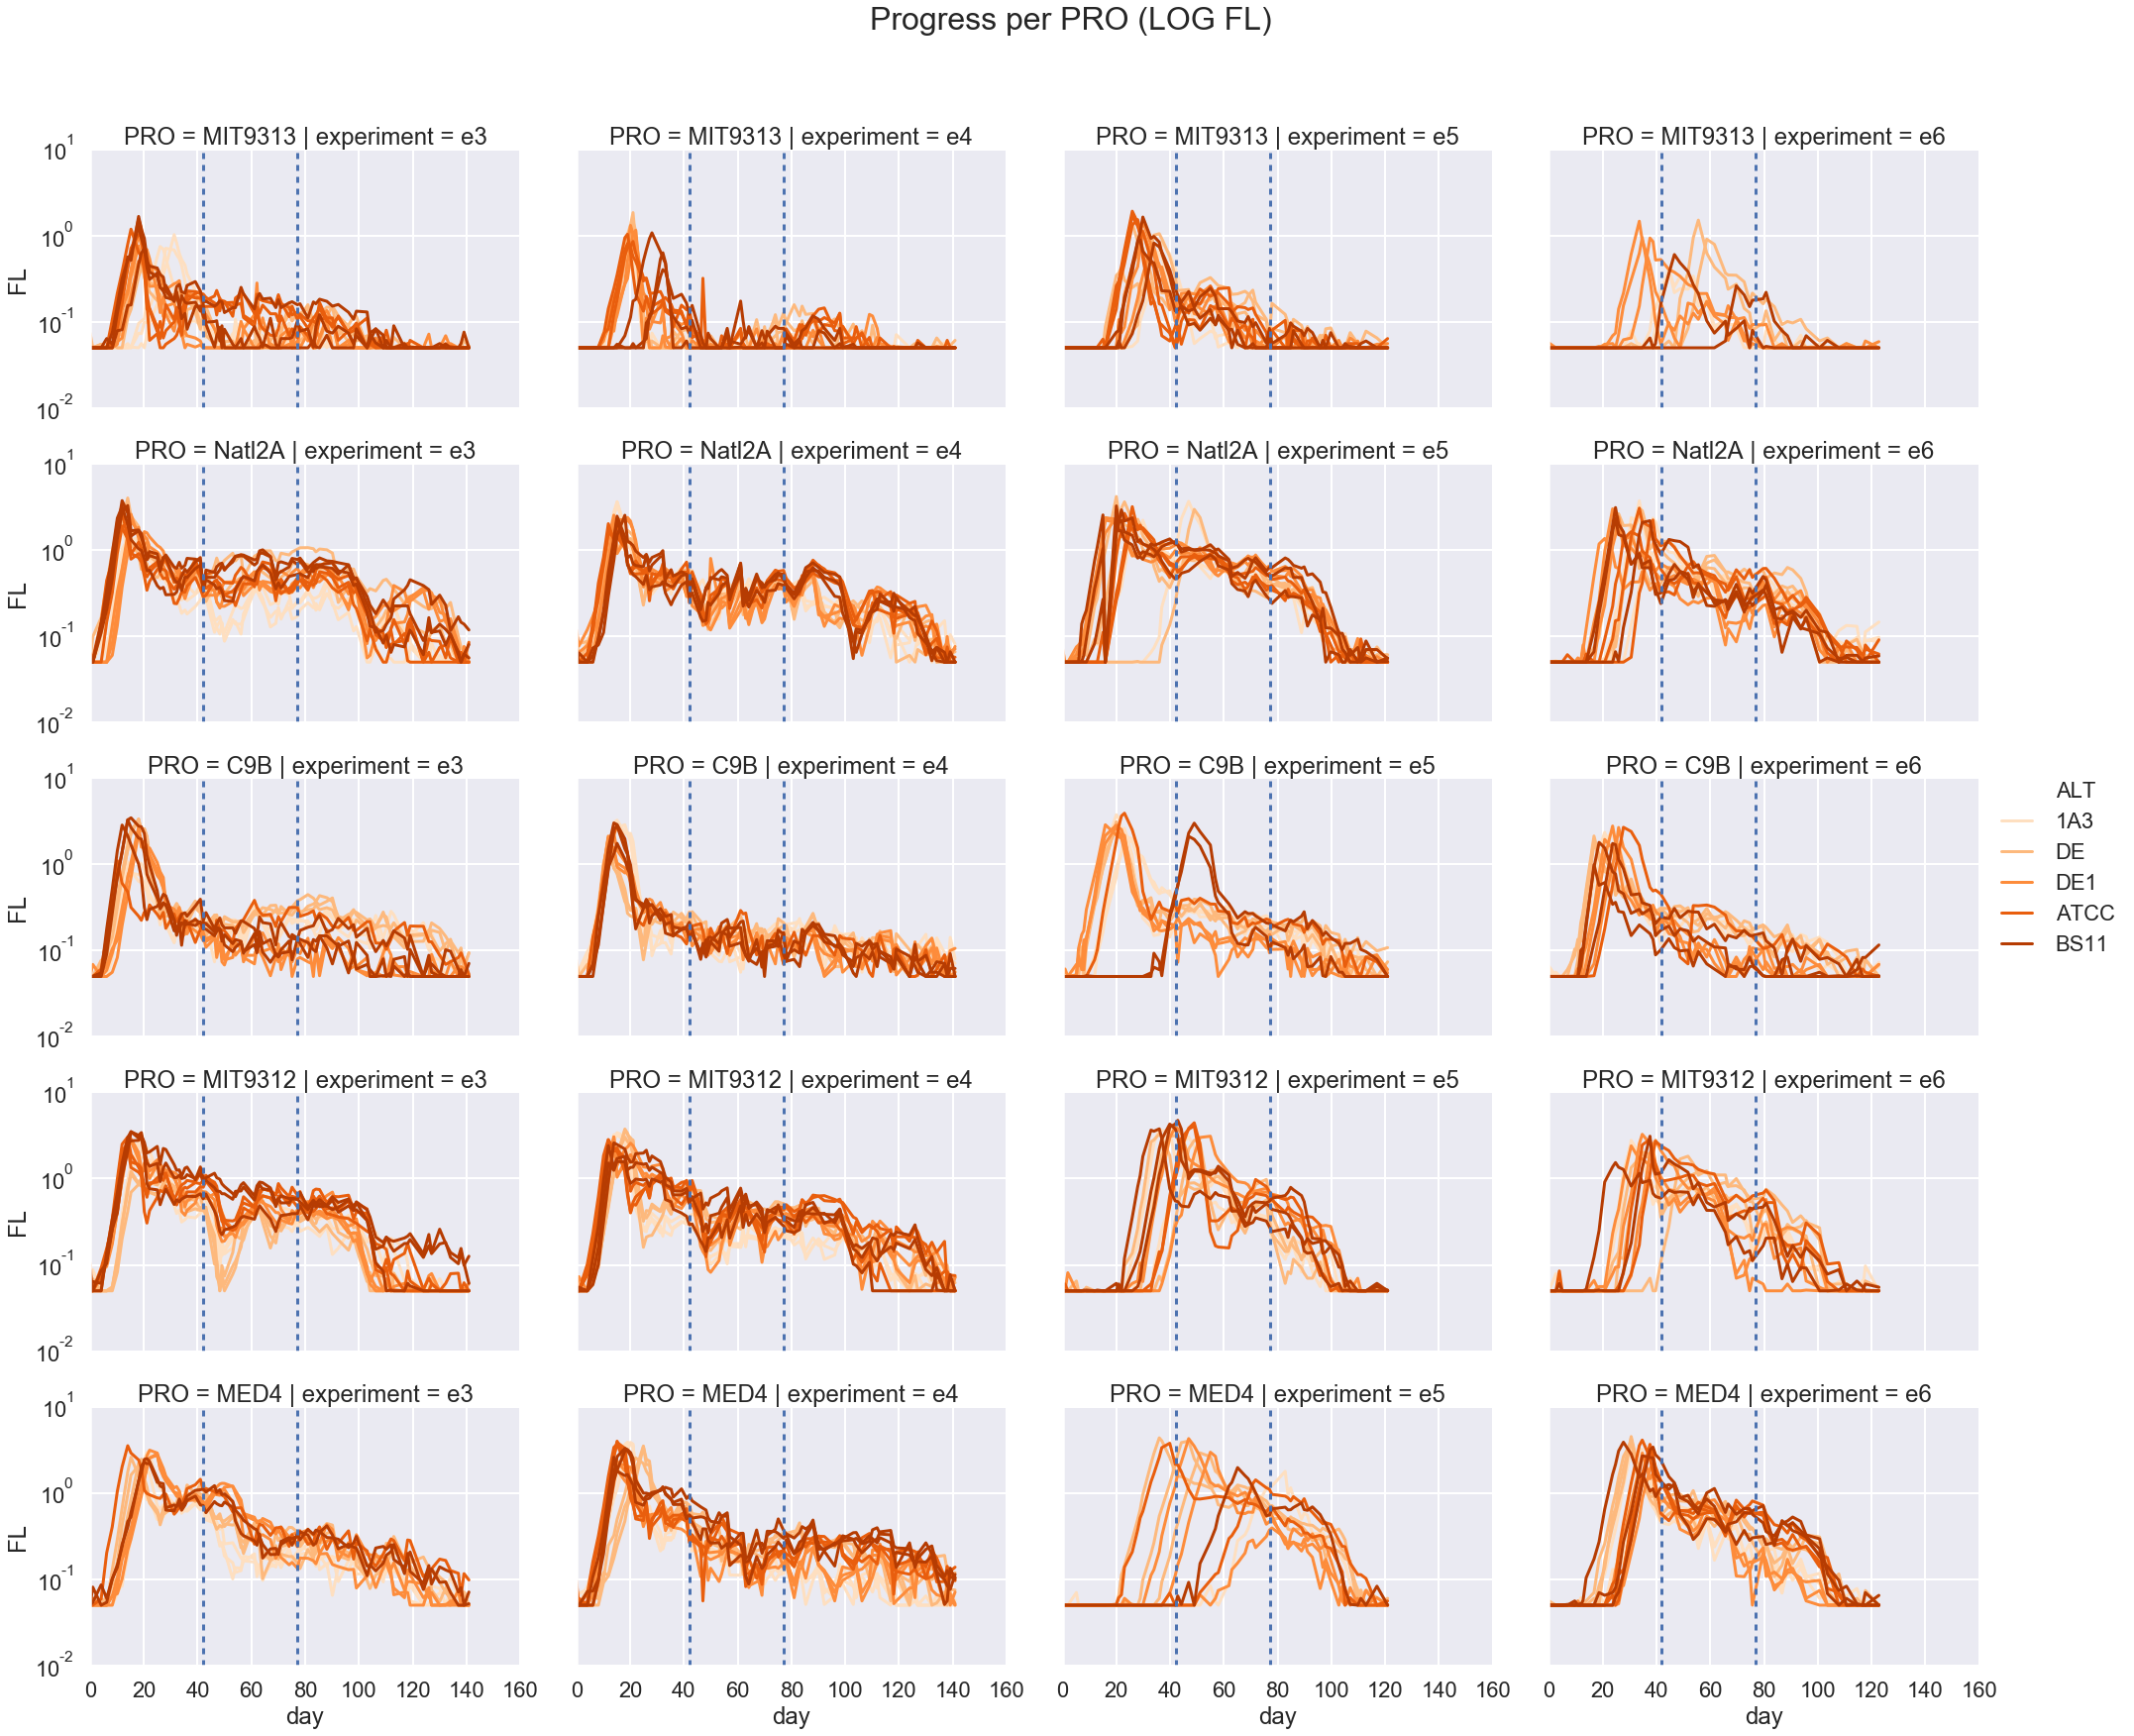

In [10]:
a= sns.relplot(data=dfc, x='day', y='FL', kind='line', 
               #ci='sd',
               estimator=None, units='experiment_sample',
            row='PRO', hue='ALT', col='experiment', row_order=porder,
            palette=apallete, hue_order=aorder,
            aspect=1.4
           )
a.fig.get_axes()[0].set_yscale('log')
for l in a.axes:
    for ax in l:
        ax.axvline(77, ls='--', label='17')
        ax.axvline(42, ls='--', label='23')
    
plt.subplots_adjust(top=0.9)
plt.suptitle("Progress per PRO (LOG FL)", fontsize=32)
plt.show()


# TSFRESH features 

In [18]:
metadf = cp.get_meta(dfc)
metadf.index = metadf.experiment_sample
y= metadf.PRO + ','+ metadf.ALT

y.head()

experiment_sample
e3, 10A      C9B,DE
e3, 10B      C9B,DE
e3, 10C      C9B,DE
e3, 11A    MED4,DE1
e3, 11B    MED4,DE1
dtype: object

In [19]:
extracted_features = tsfresh.extract_relevant_features(
    dfc.loc[:,['experiment_sample', 'day', 'FL', 
       #'logFL', 'cumsumFL', 'cumsumlogFL', 'zscoreFL', 'diffFL', 'difflogFL',
       #'diffday', 'rateFL', 'ratelogFL', 
    ]],
    y,
     column_id='experiment_sample', column_kind=None, 
     column_sort='day', 
     column_value='FL')


Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:12<00:00,  1.56it/s]
 'FL__fft_coefficient__coeff_40__attr_"angle"'
 'FL__fft_coefficient__coeff_40__attr_"imag"'
 'FL__fft_coefficient__coeff_40__attr_"real"'
 'FL__fft_coefficient__coeff_41__attr_"abs"'
 'FL__fft_coefficient__coeff_41__attr_"angle"'
 'FL__fft_coefficient__coeff_41__attr_"imag"'
 'FL__fft_coefficient__coeff_41__attr_"real"'
 'FL__fft_coefficient__coeff_42__attr_"abs"'
 'FL__fft_coefficient__coeff_42__attr_"angle"'
 'FL__fft_coefficient__coeff_42__attr_"imag"'
 'FL__fft_coefficient__coeff_42__attr_"real"'
 'FL__fft_coefficient__coeff_43__attr_"abs"'
 'FL__fft_coefficient__coeff_43__attr_"angle"'
 'FL__fft_coefficient__coeff_43__attr_"imag"'
 'FL__fft_coefficient__coeff_43__attr_"real"'
 'FL__fft_coefficient__coeff_44__attr_"abs"'
 'FL__fft_coefficient__coeff_44__attr_"angle"'
 'FL__fft_coefficient__coeff_44__attr_"imag"'
 'FL__fft_coefficient__coeff_44__attr_"real"'
 'FL_

 'FL__fft_coefficient__coeff_99__attr_"real"'] did not have any finite values. Filling with zeros.


In [20]:
extracted_features.shape

(270, 203)

In [21]:
extracted_features.head()

variable,"FL__fft_coefficient__coeff_25__attr_""imag""",FL__ratio_beyond_r_sigma__r_6,"FL__fft_coefficient__coeff_27__attr_""real""",FL__autocorrelation__lag_8,"FL__change_quantiles__f_agg_""var""__isabs_True__qh_0.2__ql_0.0",FL__longest_strike_above_mean,FL__partial_autocorrelation__lag_8,FL__quantile__q_0.1,"FL__change_quantiles__f_agg_""var""__isabs_False__qh_0.2__ql_0.0","FL__change_quantiles__f_agg_""mean""__isabs_True__qh_0.2__ql_0.0",...,"FL__cwt_coefficients__widths_(2, 5, 10, 20)__coeff_14__w_20","FL__agg_linear_trend__f_agg_""var""__chunk_len_50__attr_""slope""","FL__change_quantiles__f_agg_""var""__isabs_False__qh_0.6__ql_0.0","FL__change_quantiles__f_agg_""var""__isabs_False__qh_0.6__ql_0.2","FL__change_quantiles__f_agg_""mean""__isabs_True__qh_1.0__ql_0.4","FL__agg_linear_trend__f_agg_""mean""__chunk_len_5__attr_""intercept""","FL__fft_coefficient__coeff_17__attr_""abs""","FL__fft_coefficient__coeff_16__attr_""abs""","FL__fft_coefficient__coeff_29__attr_""abs""","FL__fft_coefficient__coeff_12__attr_""abs"""
id,,,,,,,,,,,,,,,,,,,,,
"e3, 10A",1.149459,0.0,0.759614,-0.124715,0.000227,8.0,-0.186553,0.1150,0.000662,0.021083,...,3.298089,-0.517766,0.001761,0.001260,0.179286,0.830299,0.653722,1.280298,0.461446,1.231128
"e3, 10B",1.010519,0.0,0.798260,-0.122970,0.000567,8.0,-0.168491,0.1022,0.001475,0.030417,...,3.267963,-0.520867,0.001611,0.001580,0.180341,0.804142,0.510301,1.092711,0.657630,1.766446
"e3, 10C",0.653288,0.0,0.518555,-0.134379,0.000226,9.0,-0.354271,0.1050,0.000628,0.020100,...,3.155758,-0.488912,0.002341,0.001449,0.169605,0.800854,0.572317,0.614306,0.383031,1.801285
"e3, 11A",-0.038809,0.0,0.037937,0.175252,0.000005,28.0,-0.063560,0.0500,0.000006,0.001000,...,4.389896,-0.405766,0.003588,0.005747,0.153023,1.077665,0.795260,1.733443,0.615700,1.913015
"e3, 11B",-0.156945,0.0,-0.027359,0.187791,0.000046,26.0,-0.237303,0.0500,0.000073,0.005250,...,4.849092,-0.533560,0.001191,0.001504,0.179317,1.088647,0.805451,0.972723,0.430142,2.000209


In [22]:
clf = cp.forest_classifier(X=extracted_features, y=y)

0.48148148148148145


accuracy: 0.48148148148148145


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

     C9B,1A3       0.50      0.92      0.65        12
    C9B,ATCC       0.00      0.00      0.00         4
    C9B,BS11       1.00      0.45      0.62        11
      C9B,DE       0.71      0.83      0.77        12
     C9B,DE1       0.52      1.00      0.69        12
    MED4,1A3       0.50      0.10      0.17        10
   MED4,ATCC       0.00      0.00      0.00         9
   MED4,BS11       0.00      0.00      0.00         9
     MED4,DE       0.23      1.00      0.38        12
    MED4,DE1       0.43      0.50      0.46        12
 MIT9312,1A3       0.00      0.00      0.00        12
MIT9312,ATCC       0.00      0.00      0.00        10
MIT9312,BS11       1.00      0.55      0.71        11
  MIT9312,DE       0.50      0.50      0.50        12
 MIT9312,DE1       0.00      0.00      0.00        11
 MIT9313,1A3       0.88      0.78      0.82         9
MIT9313,ATCC       0.69      1.00      0.82         9
MIT9313,BS11       0.86    

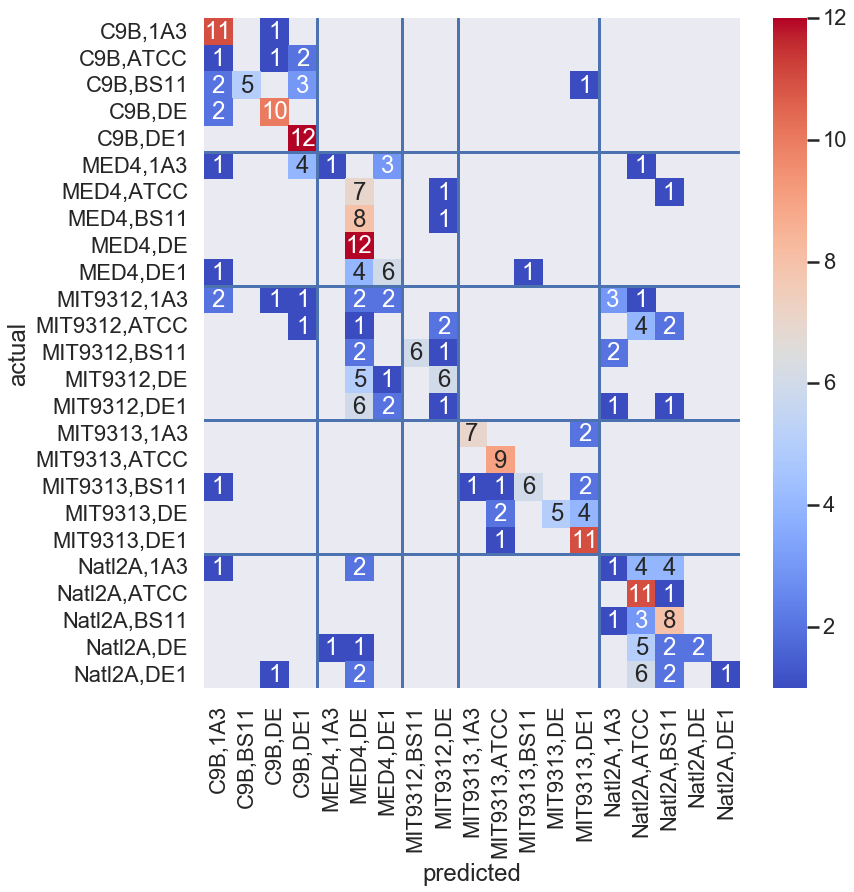

In [32]:
fig, ax = plt.subplots(figsize=(12,12))
cp.forest_heatmap(clf=clf, X=extracted_features, y=y, ax=ax)
ax.axhline(5)
ax.axhline(15)
ax.axhline(20)
ax.axhline(10)
ax.axvline(4)
ax.axvline(7)
ax.axvline(9)
ax.axvline(14)

accuracy: 0.774074074074074
              precision    recall  f1-score   support

         C9B       0.78      0.98      0.87        51
        MED4       0.60      0.79      0.68        52
     MIT9312       0.89      0.29      0.43        56
     MIT9313       0.96      0.98      0.97        52
      Natl2A       0.76      0.86      0.81        59

   micro avg       0.77      0.77      0.77       270
   macro avg       0.80      0.78      0.75       270
weighted avg       0.80      0.77      0.75       270



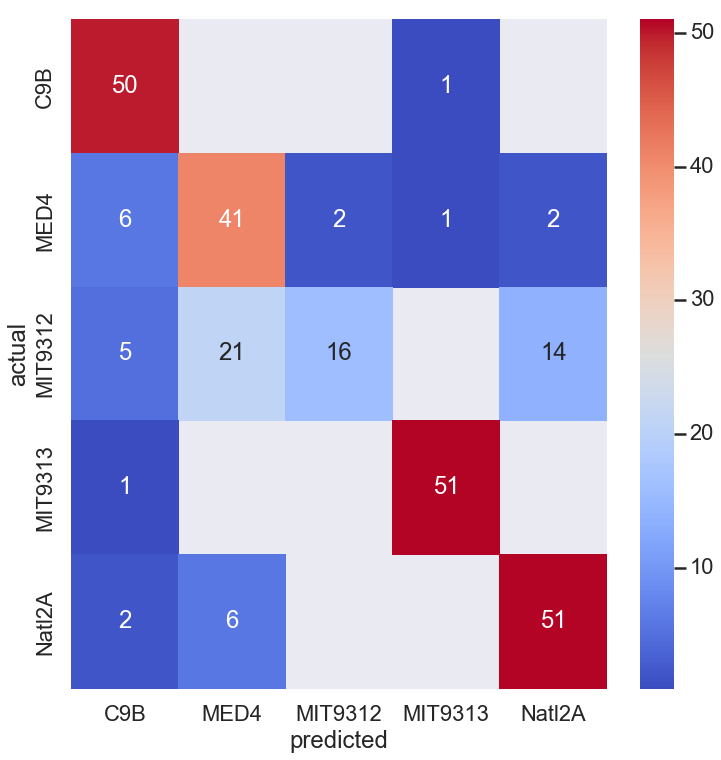

In [28]:
func = lambda x : x.str.split(',', expand=True)[0]
fig, ax = plt.subplots(figsize=(12,12))
cp.forest_heatmap(clf=clf, X=extracted_features, y=y, ax=ax, func=func)

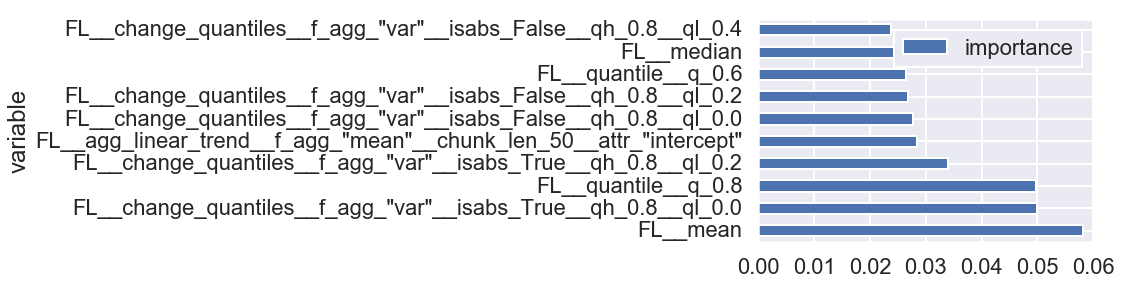

In [29]:
cp.forest_feature_importance(clf, extracted_features.columns)

In [7]:
g = cp.generate_features(dfc)

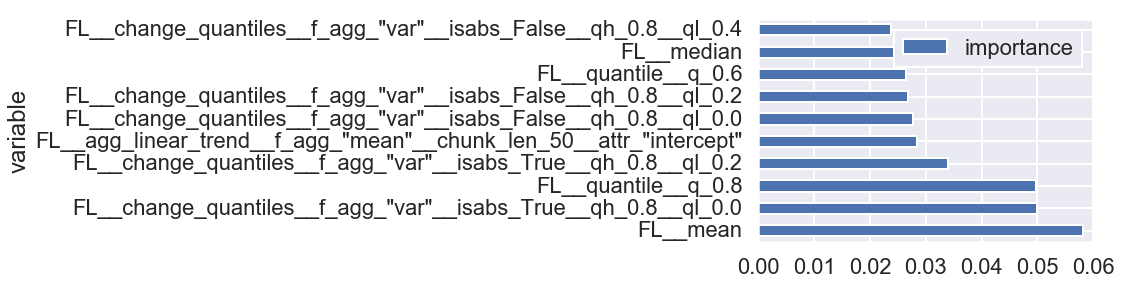

In [24]:
cp.forest_feature_importance(clf=clf, col_names=extracted_features.columns)

# Time Series Resampling

In [50]:
df.head()

,day,experiment,sample,FL,PRO,ALT,culture,FL_orig,logFL,cumsumFL,cumsumlogFL,zscoreFL,diffFL,difflogFL,diffday,rateFL,ratelogFL,experiment_sample
0,0.000000,e1,1A,0.133,MED4,1A3,Co_Culture,0.133,-2.017406,0.133,-2.017406,-0.588889,NaN,NaN,NaN,NaN,NaN,"e1, 1A"
1,0.715972,e1,1A,0.159,MED4,1A3,Co_Culture,0.159,-1.838851,0.292,-3.856257,-0.575917,0.026,0.178555,0.715972,0.036314,0.249388,"e1, 1A"
2,1.925694,e1,1A,0.155,MED4,1A3,Co_Culture,0.155,-1.864330,0.447,-5.720587,-0.577913,-0.004,-0.025479,1.209722,-0.003307,-0.021062,"e1, 1A"
3,2.831250,e1,1A,0.180,MED4,1A3,Co_Culture,0.180,-1.714798,0.627,-7.435386,-0.565440,0.025,0.149532,0.905556,0.027607,0.165127,"e1, 1A"
4,6.674306,e1,1A,0.632,MED4,1A3,Co_Culture,0.632,-0.458866,1.259,-7.894252,-0.339936,0.452,1.255933,3.843056,0.117615,0.326806,"e1, 1A"


In [53]:
df = df.loc[:, ['day', 'experiment', 'sample', 'FL', 'PRO', 'ALT', 'culture', 'experiment_sample'] ]

In [54]:
df.columns

Index(['day', 'experiment', 'sample', 'FL', 'PRO', 'ALT', 'culture',
       'experiment_sample'],
      dtype='object')

In [125]:
def resample_func(df, x_col='day', y_col='FL', period='3d' ):
    t = df
    t.index = pd.to_timedelta(t[x_col], unit='d')
    return t.resample(period).agg({y_col : 'mean'})
    #return t.resample(period).agg({y_col : ['mean', 'median','std']})
    #return t.rolling(period, min_periods=1).agg({y_col : ['mean', 'median','std']})


In [126]:
df_resampled = df.groupby(['experiment_sample', 'experiment', 'sample', 'PRO', 'ALT', 'culture'] ).apply(resample_func)

In [127]:
#df_resampled.columns = ["_".join(x) for x in df_resampled.columns.ravel() ]
df_resampled = df_resampled.reset_index()
df_resampled.dropna(inplace=True)
df_resampled['Variable'] = 'FL'
df_resampled.rename(columns={'FL' : 'Value'}, inplace=True)

In [128]:
df_resampled.head()

,experiment_sample,experiment,sample,PRO,ALT,culture,day,Value,Variable
0,"e1, 10A",e1,10A,C9B,DE,Co_Culture,0 days,0.119500,FL
2,"e1, 10A",e1,10A,C9B,DE,Co_Culture,6 days,0.444000,FL
3,"e1, 10A",e1,10A,C9B,DE,Co_Culture,9 days,1.593500,FL
4,"e1, 10A",e1,10A,C9B,DE,Co_Culture,12 days,4.713667,FL
5,"e1, 10A",e1,10A,C9B,DE,Co_Culture,15 days,3.397000,FL


In [153]:
df_resampled = df_resampled.loc[df_resampled.experiment.isin(['e1', 'e3', 'e4', 'e5', 'e6'])]


In [166]:
X = cp.experiments2X(df_resampled, value_col='Value', cumsummode=False )
X_train = X[X.index.str.startswith('e1') |
             X.index.str.startswith('e3') |
             X.index.str.startswith('e4') |
             X.index.str.startswith('e5') ]
X_test = X[X.index.str.startswith('e6') ]
           

metadf = cp.get_meta(df_resampled, value_col='Value')
metadf.index = metadf.experiment_sample

metadf_train = metadf[metadf.index.str.startswith('e1') |
             metadf.index.str.startswith('e3') |
             metadf.index.str.startswith('e4') |
             metadf.index.str.startswith('e5') ]
metadf_test = metadf[metadf.index.str.startswith('e6') ]

y_train= metadf_train.PRO + ','+ metadf_train.ALT
y_test= metadf_test.PRO + ','+ metadf_test.ALT
clf = cp.forest_classifier(X=X_train, y=y_train)

0.3762057877813505


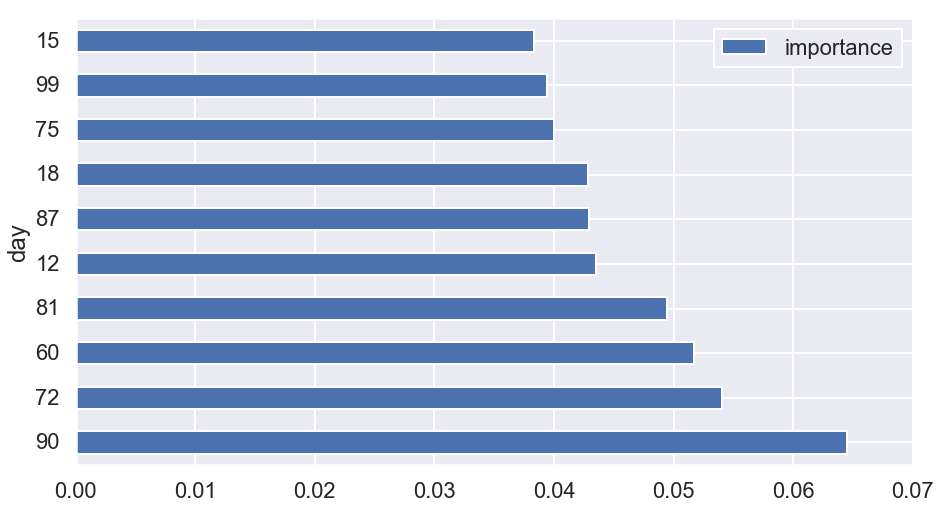

In [168]:
cp.forest_feature_importance(clf, X_train.columns)

accuracy: 0.662379421221865
              precision    recall  f1-score   support

         C9B       0.58      0.71      0.64        52
        MED4       0.92      0.42      0.57        55
     MIT9312       0.63      0.62      0.63        61
     MIT9313       0.75      0.95      0.84        61
      Natl2A       0.58      0.73      0.64        62
         all       0.67      0.33      0.44        12
        allP       1.00      0.12      0.22         8

   micro avg       0.66      0.66      0.66       311
   macro avg       0.73      0.56      0.57       311
weighted avg       0.70      0.66      0.65       311



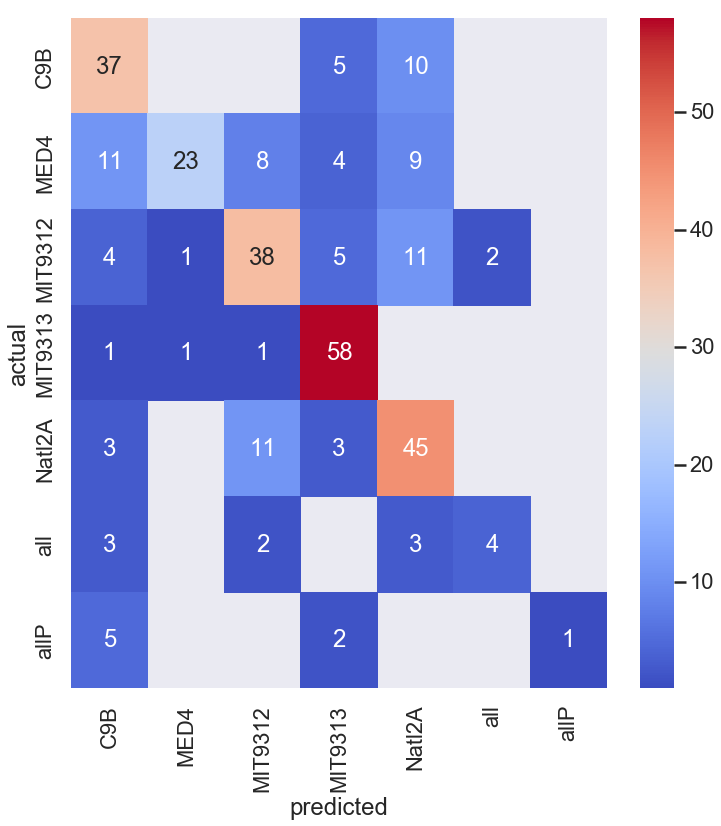

In [169]:
func = lambda x : x.str.split(',', expand=True)[0]
fig, ax = plt.subplots(figsize=(12,12))
cp.forest_heatmap(clf=clf, X=X_train, y=y_train, ax=ax, func=func)

accuracy: 0.4714285714285714


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         C9B       0.50      1.00      0.67        13
        MED4       0.00      0.00      0.00        15
     MIT9312       0.36      0.38      0.37        13
     MIT9313       0.70      0.78      0.74         9
      Natl2A       0.47      0.53      0.50        15
         all       0.00      0.00      0.00         3
        allP       0.00      0.00      0.00         2

   micro avg       0.47      0.47      0.47        70
   macro avg       0.29      0.39      0.32        70
weighted avg       0.35      0.47      0.39        70



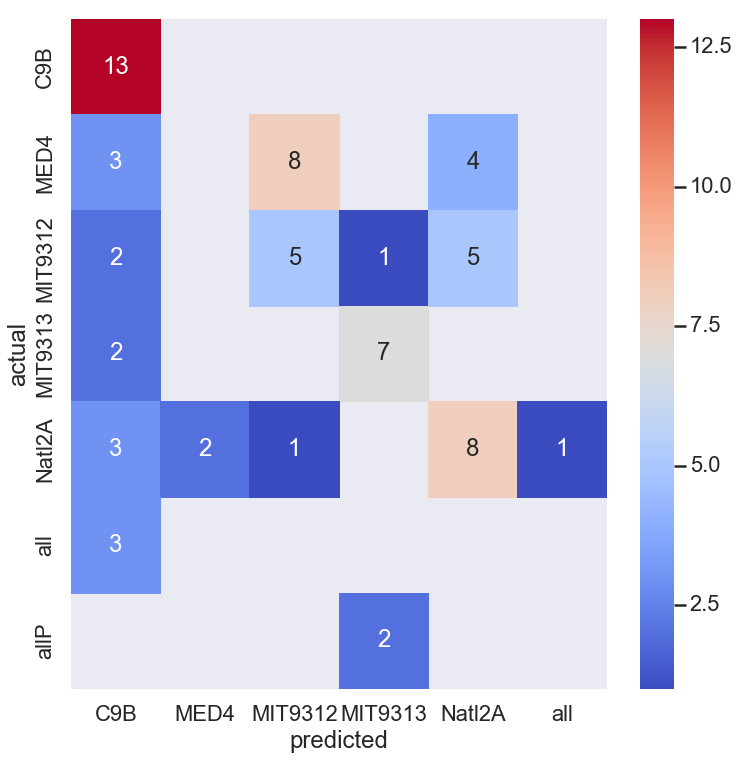

In [170]:
func = lambda x : x.str.split(',', expand=True)[0]
fig, ax = plt.subplots(figsize=(12,12))
cp.forest_heatmap(clf=clf, X=X_test, y=y_test, ax=ax, func=func)

In [172]:
X = cp.experiments2X(df_resampled, value_col='Value', cumsummode=False )
X_train = X[X.index.str.startswith('e1') |
             X.index.str.startswith('e3') |
             X.index.str.startswith('e4') |
             X.index.str.startswith('e5') ]
X_test = X[X.index.str.startswith('e6') ]
           

metadf = cp.get_meta(df_resampled, value_col='Value')
metadf.index = metadf.experiment_sample

metadf_train = metadf[metadf.index.str.startswith('e1') |
             metadf.index.str.startswith('e3') |
             metadf.index.str.startswith('e4') |
             metadf.index.str.startswith('e5') ]
metadf_test = metadf[metadf.index.str.startswith('e6') ]

y_train= metadf_train.PRO  #+ ','+ metadf_train.ALT
y_test= metadf_test.PRO # + ','+ metadf_test.ALT
clf = cp.forest_classifier(X=X_train, y=y_train)

0.594855305466238


accuracy: 0.594855305466238


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         C9B       0.60      0.62      0.61        52
        MED4       0.77      0.18      0.29        55
     MIT9312       0.56      0.62      0.59        61
     MIT9313       0.72      1.00      0.84        61
      Natl2A       0.48      0.71      0.57        62
         all       0.00      0.00      0.00        12
        allP       0.00      0.00      0.00         8

   micro avg       0.59      0.59      0.59       311
   macro avg       0.45      0.45      0.41       311
weighted avg       0.58      0.59      0.55       311



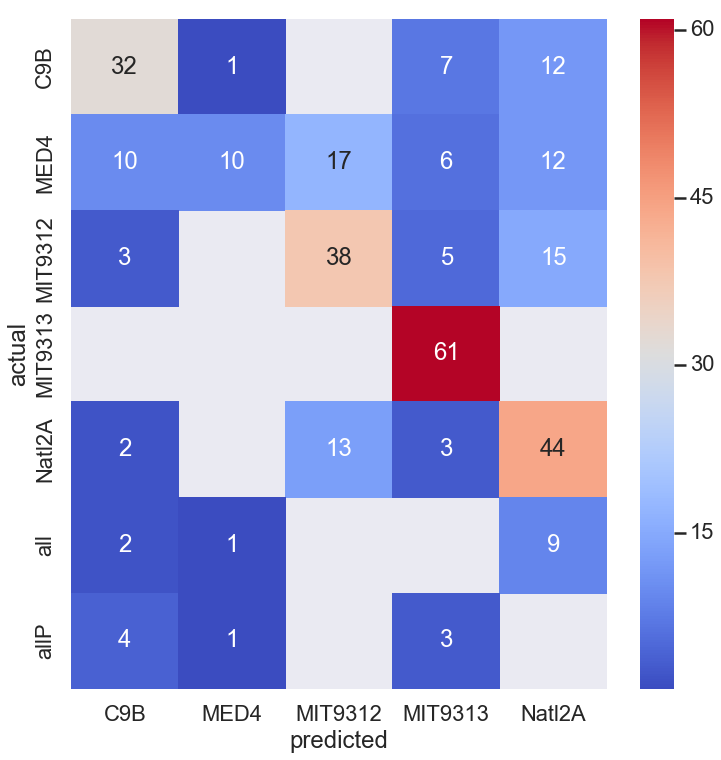

In [174]:
func = lambda x : x.str.split(',', expand=True)[0]
fig, ax = plt.subplots(figsize=(12,12))
cp.forest_heatmap(clf=clf, X=X_train, y=y_train, ax=ax) #, func=func)

accuracy: 0.4714285714285714


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         C9B       0.48      0.77      0.59        13
        MED4       0.00      0.00      0.00        15
     MIT9312       0.36      0.69      0.47        13
     MIT9313       0.50      0.67      0.57         9
      Natl2A       0.67      0.53      0.59        15
         all       0.00      0.00      0.00         3
        allP       0.00      0.00      0.00         2

   micro avg       0.47      0.47      0.47        70
   macro avg       0.29      0.38      0.32        70
weighted avg       0.36      0.47      0.40        70



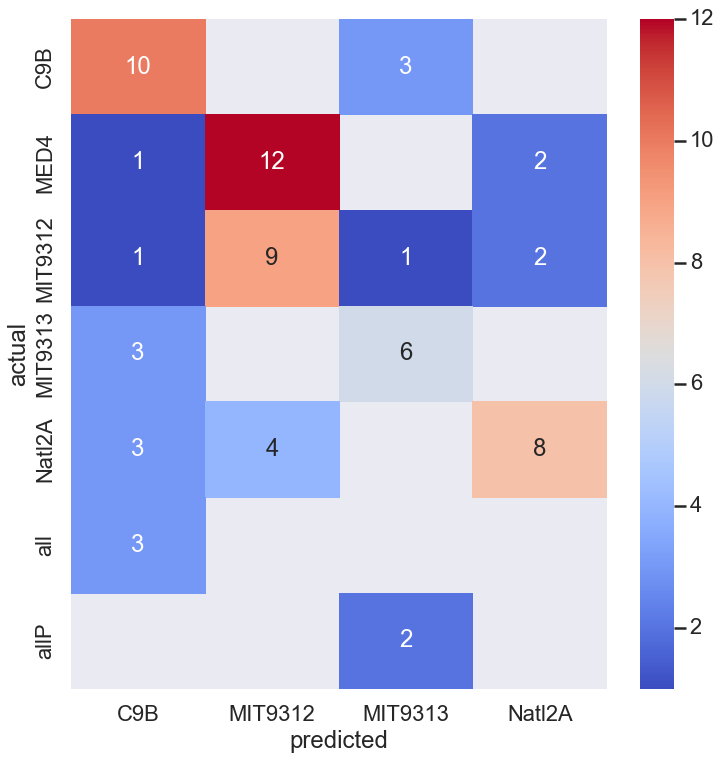

In [173]:
func = lambda x : x.str.split(',', expand=True)[0]
fig, ax = plt.subplots(figsize=(12,12))
cp.forest_heatmap(clf=clf, X=X_test, y=y_test, ax=ax) #, func=func)

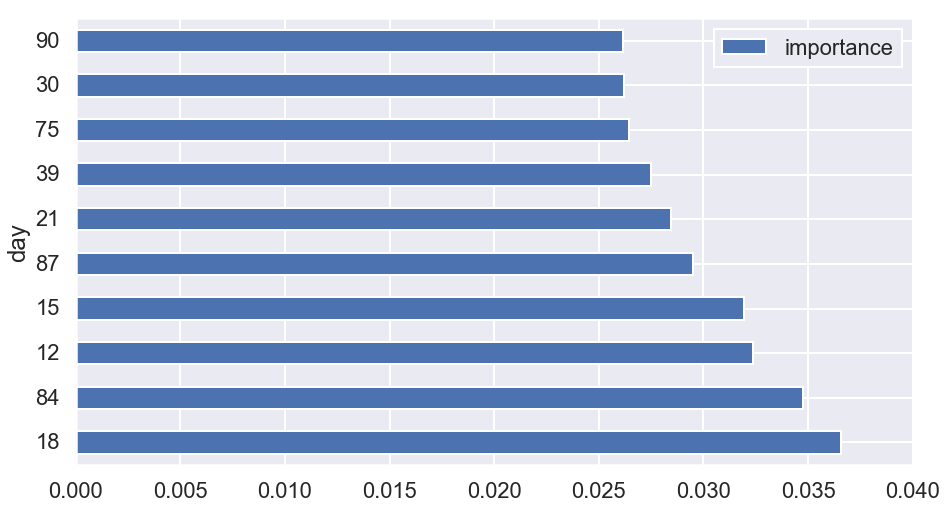

In [266]:
cp.forest_feature_importance(clf, X_train.columns)

In [265]:
clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [101]:
df_resampled_3d = df.groupby(['experiment_sample', 'experiment', 'sample', 'PRO', 'ALT', 'culture'] 
                            ).apply(lambda x: resample_func(x, period='3d'))
df_resampled_3d.columns = ["_".join(x) for x in df_resampled_3d.columns.ravel() ]
df_resampled_3d = df_resampled_3d.reset_index()


In [260]:
import sklearn.metrics as metrics

def _calc_score_for_one_type(res, y_true, y_pred, suffix):
    precision, recall, f1, support = metrics.precision_recall_fscore_support(
        y_true= y_true,
        y_pred = y_pred,
        average='weighted'
    )
    res[f'accuracy_{suffix}'] = metrics.accuracy_score(y_true=y_true, y_pred=y_pred)
    res[f'precision_{suffix}'] = precision
    res[f'recall_{suffix}'] = recall
    res[f'f1_{suffix}'] = f1
    res[f'support_{suffix}'] = support
    

def score_model(modelname, clf, X_train, y_train, X_test, y_test):
    func = lambda x : x.str.split(',', expand=True)[0]
    scalar = StandardScaler()
    scaledX_train = scalar.fit_transform(X_train)
    scaledX_test  = scalar.transform(X_test)
    
    y_train_pred = clf.predict(scaledX_train)
    y_test_pred  = clf.predict(scaledX_test)
    

    y_train_pro = func(y_train)
    y_test_pro = func(y_test)
    y_train_pred_pro = func(pd.Series(y_train_pred, index=y_train.index))
    y_test_pred_pro = func(pd.Series(y_test_pred, index=y_test.index))
    
    res = {'model': modelname}
    res['oob_score'] = clf.oob_score_ 
    _calc_score_for_one_type(res, y_true=y_train, y_pred=y_train_pred, suffix='train')
    _calc_score_for_one_type(res, y_true=y_test, y_pred=y_test_pred, suffix='test')
    _calc_score_for_one_type(res, y_true=y_train_pro, y_pred=y_train_pred_pro, suffix='train_PRO')
    _calc_score_for_one_type(res, y_true=y_test_pro, y_pred=y_test_pred_pro, suffix='test_PRO')
    
    y_train_df = pd.DataFrame(data={
        f'{modelname}_y' : y_train,
        f'{modelname}_y_PRO' : y_train_pro,
        f'{modelname}_y_pred' : y_train_pred,
        f'{modelname}_y_pred_PRO' : y_train_pred_pro,
    }, index=y_train.index)
    y_train_df['Type'] = 'Train'
    y_test_df = pd.DataFrame(data={
        f'{modelname}_y' : y_test,
        f'{modelname}_y_PRO' : y_test_pro,
        f'{modelname}_y_pred' : y_test_pred,
        f'{modelname}_y_pred_PRO' : y_test_pred_pro,
    }, index=y_test.index)
    y_test_df['Type'] = 'Test'
    y_df = pd.concat([y_train_df, y_test_df])        
    return clf, res, y_df
    

In [261]:
import sklearn.metrics as metrics

def ml(X, metadf, modelname):
    X_train = X[X.index.str.startswith('e1') |
                 X.index.str.startswith('e3') |
                 X.index.str.startswith('e4') |
                 X.index.str.startswith('e5') ]
    X_test = X[X.index.str.startswith('e6') ]

    metadf.index = metadf.experiment_sample
    metadf_train = metadf[metadf.index.str.startswith('e1') |
                 metadf.index.str.startswith('e3') |
                 metadf.index.str.startswith('e4') |
                 metadf.index.str.startswith('e5') ]
    metadf_test = metadf[metadf.index.str.startswith('e6') ]

    y_train= metadf_train.PRO  + ','+ metadf_train.ALT
    y_test= metadf_test.PRO + ','+ metadf_test.ALT
    clf = cp.forest_classifier(X=X_train, y=y_train)
    return (modelname, clf, X_train, y_train, X_test, y_test)
    
    return score_model(modelname, clf, X_train, y_train, X_test, y_test)


1. make X y 
2. split to train and test
3. fit
4. report
     scores on train (accuracy, precision, recall)
     oob score
     scores on test
     

In [262]:

(modelname, clf, X_train, y_train, X_test, y_test) = ml(X, metadf, 'try')

1.0


In [263]:
clf, res, y_df = score_model(modelname, clf, X_train, y_train, X_test, y_test)

C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [264]:
y_df

,try_y,try_y_PRO,try_y_pred,try_y_pred_PRO,Type
experiment_sample,,,,,
"e1, 10A","C9B,DE",C9B,"C9B,DE",C9B,Train
"e1, 10B","C9B,DE",C9B,"C9B,DE",C9B,Train
"e1, 10C","C9B,DE",C9B,"C9B,DE",C9B,Train
"e1, 11A","MED4,DE1",MED4,"MED4,DE1",MED4,Train
"e1, 11B","MED4,DE1",MED4,"MED4,DE1",MED4,Train
"e1, 11C","MED4,DE1",MED4,"MED4,DE1",MED4,Train
"e1, 12A","MIT9313,DE1",MIT9313,"MIT9313,DE1",MIT9313,Train
"e1, 12B","MIT9313,DE1",MIT9313,"MIT9313,DE1",MIT9313,Train
"e1, 12C","MIT9313,DE1",MIT9313,"MIT9313,DE1",MIT9313,Train


In [267]:
res

{'model': 'try',
 'oob_score': 0.5337620578778135,
 'accuracy_train': 1.0,
 'precision_train': 1.0,
 'recall_train': 1.0,
 'f1_train': 1.0,
 'support_train': None,
 'accuracy_test': 0.08571428571428572,
 'precision_test': 0.09119047619047618,
 'recall_test': 0.08571428571428572,
 'f1_test': 0.07513005202080832,
 'support_test': None,
 'accuracy_train_PRO': 1.0,
 'precision_train_PRO': 1.0,
 'recall_train_PRO': 1.0,
 'f1_train_PRO': 1.0,
 'support_train_PRO': None,
 'accuracy_test_PRO': 0.34285714285714286,
 'precision_test_PRO': 0.40573979591836734,
 'recall_test_PRO': 0.34285714285714286,
 'f1_test_PRO': 0.3148499776085983,
 'support_test_PRO': None}